In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df1 = pd.read_csv(r'C:\Users\E1180014\Projetos\datasets\booking\hotel_booking.csv')
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [5]:
df2 = df1.copy()

In [8]:
df2.shape

(119390, 36)

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [17]:
df2.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [21]:
# Retorna a quantidade de registros de cada coluna
df2.count()

hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                              119390
country                           118902
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
agent                             103050
company         

In [20]:
# Retorna a coluna com menos registros
# Nesse caso, retorna a coluna com mais registros nulos
df2.count().idxmin()

'company'

In [25]:
# Podemos eliminar essa coluna do dataset
df2.drop(axis=1, columns='company', inplace=True)

In [27]:
df2.count()

hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                              119390
country                           118902
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
agent                             103050
days_in_waiting_

In [28]:
df2.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


In [29]:
df2.describe(include='O')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21,Michael Johnson,Michael.C@gmail.com,162-504-3500,************3627
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461,48,6,1,28


In [31]:
df2['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [41]:
df2 = df2.dropna(subset=['country'])
df2['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

In [36]:
# Mostra os 5 países que tiveram maior número de viajantes
df2['country'].value_counts()[0:5]

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: country, dtype: int64

In [44]:
price = df2['adr'].max()
price

5400.0

In [47]:
rownum = df2['adr'].idxmax()
rownum

48515

In [52]:
# A função loc recebe o indice e a coluna da qual quero o dado referente àquele index
# No caso stou dizendo que quero o valor da linha 48515 (linha com maior adr) da coluna name
name = df2.loc[rownum, 'name']
name

'Daniel Walter'

In [63]:
# Media de valor de adr arrendondada em 2 casas decimais
averagea = df2['adr'].mean()
averageb = round(averagea, 2)
averageb

102.0

In [81]:
# Media de noites nos hoteis, seja em fim de semana ou dias de semana
df2['total_stay'] = df2['stays_in_weekend_nights'] + df2['stays_in_week_nights']
average = round(df2['total_stay'].mean(), 2)
average

3.43

In [66]:
# Cria um novo dataframe só com pessoas que tiveram numeros de pedidos especiais iguais a 5
# Em seguida mostra nome, email e numero de pedidos especiais de cada um
five_requests = df2[df2['total_of_special_requests'] == 5]
five_requests[['name', 'email', 'total_of_special_requests']]

,name,email,total_of_special_requests
11125,Laura Sanders,Sanders_Laura@hotmail.com,5
14921,Gilbert Miller,Miller.Gilbert@aol.com,5
14922,Timothy Torres,TTorres@protonmail.com,5
24630,Jennifer Weaver,Jennifer_W@aol.com,5
27288,Crystal Horton,Crystal.H@mail.com,5
27477,Brittney Burke,Burke_Brittney16@att.com,5
29906,Cynthia Cabrera,Cabrera.Cynthia@xfinity.com,5
29949,Sarah Floyd,Sarah_F@gmail.com,5
32267,Michelle Villa,Michelle.Villa@aol.com,5
39027,Nichole Hebert,Hebert.Nichole@gmail.com,5


In [72]:
# Cria uma coluna apenas com os sobrenomes das pessoas
df2['family_names'] = df2['name'].apply(lambda x:x.split()[1])

In [73]:
# Mostra quais os cinco sobrenomes que mais aparecem no dataframe
df2['family_names'].value_counts()[0:5]

Smith       2499
Johnson     1989
Williams    1625
Jones       1438
Brown       1427
Name: family_names, dtype: int64

In [74]:
# Cria uma coluna com a quantidade total de crianças de cada reserva
df2['total_kids'] = df2['babies'] + df2['children']
df2['total_kids'].max()

10.0

In [75]:
# Cria um dataframe onde todos os registros tem 10 crianças
most_children = df2[df2['total_kids'] == 10]

In [79]:
# Seleciona nome, email, telefone, país dos registros com 10 crianças
most_children[['name', 'email', 'country', 'phone-number', 'total_kids']]

,name,email,country,phone-number,total_kids
328,Jamie Ramirez,Ramirez_Jamie22@aol.com,PRT,268-823-5667,10.0
46619,Nicholas Parker,Parker.Nicholas57@hotmail.com,PRT,440-692-0519,10.0


Text(0.5, 1.0, 'Duration of stay')

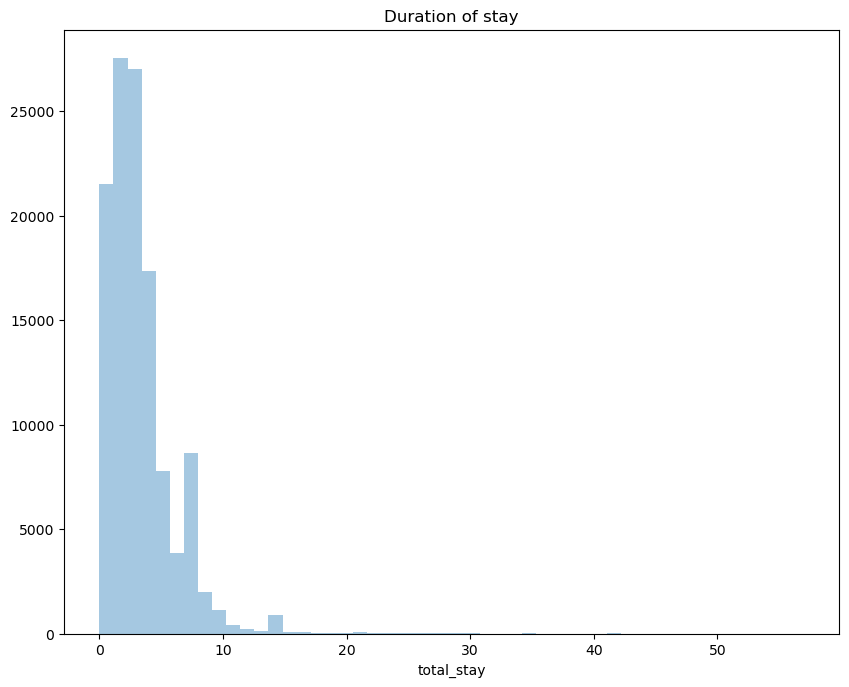

In [84]:
# Distribuição da duração total nos hoteis
plt.figure(figsize=(10,8), dpi=100)
sns.distplot(df2['total_stay'], kde=False)
plt.title('Duration of stay')

In [85]:
# Percebe-se que a maioria das diarias ficou entre 2 e 5 dias
# Poucas ultrapassaram 10 dias

In [88]:
# Existem dois tipos de hotel, City e Resort
df2['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

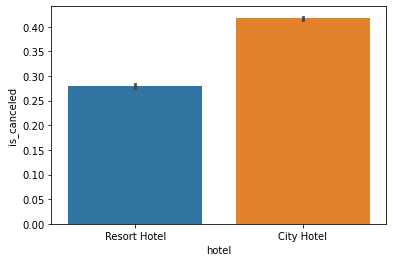

In [90]:
# Qual dos dois teve mais cancelamentos?
sns.barplot(data=df2, x=df2['hotel'], y=df2['is_canceled']);

In [91]:
# Percebe-se que City Hotels tiveram mais cancelamentos

In [93]:
df2['is_canceled'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    1
9    1
Name: is_canceled, dtype: int64

In [95]:
# Criando um dataframe apenas com os clientes que não cancelaram suas reservas
df_not_canceled = df2[df2['is_canceled']==0]
df_not_canceled.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,family_names,total_kids,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,Barnes,0.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,Baker,0.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,Parker,0.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,Murray,0.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,Hines,0.0,2


In [103]:
# Criando um gráfico para mostrar os meses com maior ocupação nos hoteis
import calendar
sorted_months = df_not_canceled['arrival_date_month'].value_counts().reindex(calendar.month_name[1:])
sorted_months

January      4068
February     5317
March        6591
April        6533
May          7102
June         6393
July         7892
August       8618
September    6367
October      6867
November     4632
December     4365
Name: arrival_date_month, dtype: int64

In [104]:
# O eixo x será os meses
x = sorted_months.index
x

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')

In [107]:
# O eixo y será a porcentagem de quatidade de reservas naquele mês em relação ao total
y = (sorted_months/sorted_months.sum())*100
y

January       5.442505
February      7.113519
March         8.817981
April         8.740384
May           9.501639
June          8.553080
July         10.558566
August       11.529868
September     8.518296
October       9.187237
November      6.197070
December      5.839856
Name: arrival_date_month, dtype: float64

C:\Users\E1180014\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


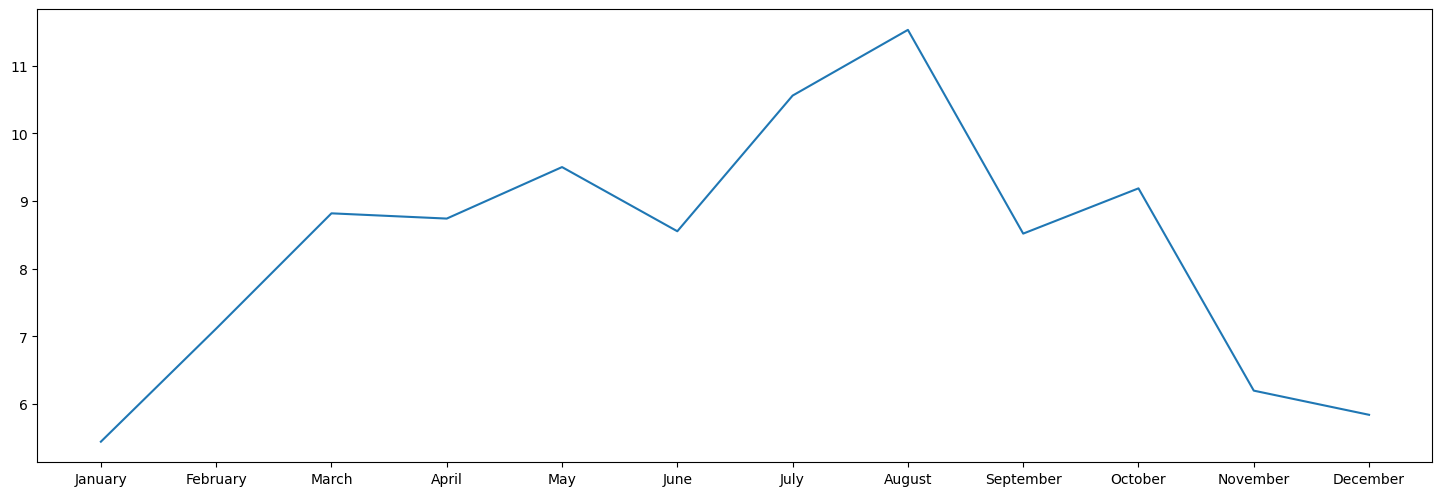

In [112]:
# dpi = dots per inch, pontos por polegada
plt.figure(figsize=(18,6), dpi=100)
sns.lineplot(x, y.values);

In [113]:
# Percebe-se que agosto foi o mês com maior porcentagem de ocupação

C:\Users\E1180014\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\E1180014\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<AxesSubplot:title={'center':'Hotel wise night stay duration (Top 10)'}, xlabel='total_nights', ylabel='count'>

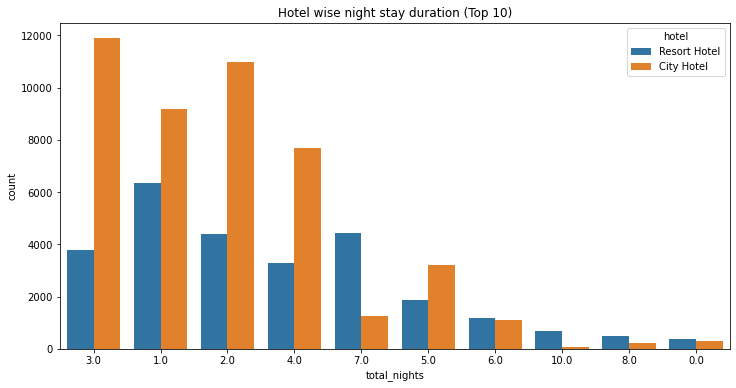

In [115]:
df_not_canceled.loc[:, 'total_nights'] = df_not_canceled['stays_in_weekend_nights'] + df_not_canceled['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_nights', hue='hotel', data=df_not_canceled,
              order = df_not_canceled.total_nights.value_counts().iloc[:10].index,ax=ax)